In [1]:
import pandas as pd
import numpy as np
import datetime
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics
import pickle

In [2]:
df1=pd.read_csv(r"Data\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [3]:
df2=pd.read_csv(r"Data\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [4]:
df3=pd.read_csv(r"Data\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [5]:
df4=pd.read_csv(r"Data\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [6]:
df5=pd.read_csv(r"Data\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187458 entries, 0 to 187457
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                187458 non-null  object 
 1   town                 187458 non-null  object 
 2   flat_type            187458 non-null  object 
 3   block                187458 non-null  object 
 4   street_name          187458 non-null  object 
 5   storey_range         187458 non-null  object 
 6   floor_area_sqm       187458 non-null  float64
 7   flat_model           187458 non-null  object 
 8   lease_commence_date  187458 non-null  int64  
 9   remaining_lease      187458 non-null  object 
 10  resale_price         187458 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.7+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [7]:
df5['remaining_lease']=df5['remaining_lease'].str.split(' ').str[0].astype(int)
df5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0


In [8]:
df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933661 entries, 0 to 933660
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                933661 non-null  object 
 1   town                 933661 non-null  object 
 2   flat_type            933661 non-null  object 
 3   block                933661 non-null  object 
 4   street_name          933661 non-null  object 
 5   storey_range         933661 non-null  object 
 6   floor_area_sqm       933661 non-null  float64
 7   flat_model           933661 non-null  object 
 8   lease_commence_date  933661 non-null  int64  
 9   resale_price         933661 non-null  float64
 10  remaining_lease      224611 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 78.4+ MB


In [9]:
df[['year','month']]=df['month'].str.split('-',expand=True)
df['block']=df['block'].str.split(r'(\D)', expand=True)[0].astype('int64')
df[['storey_start', 'storey_end']]=df['storey_range'].str.split('TO',expand=True)
df['month']=pd.to_numeric(df['month'])
df['year']=pd.to_numeric(df['year'])
df['floor_area_sqm']=pd.to_numeric(df['floor_area_sqm'])
df['resale_price']=pd.to_numeric(df['resale_price'])
df['storey_start']=pd.to_numeric(df['storey_start'])
df['storey_end']=pd.to_numeric(df['storey_end'])
df.drop(columns='storey_range', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933661 entries, 0 to 933660
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                933661 non-null  int64  
 1   town                 933661 non-null  object 
 2   flat_type            933661 non-null  object 
 3   block                933661 non-null  int64  
 4   street_name          933661 non-null  object 
 5   floor_area_sqm       933661 non-null  float64
 6   flat_model           933661 non-null  object 
 7   lease_commence_date  933661 non-null  int64  
 8   resale_price         933661 non-null  float64
 9   remaining_lease      224611 non-null  float64
 10  year                 933661 non-null  int64  
 11  storey_start         933661 non-null  int64  
 12  storey_end           933661 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 92.6+ MB


In [10]:
df['block'].max()

999

In [11]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
storey_start                0
storey_end                  0
dtype: int64

In [12]:
df['remaining_lease'].fillna(99-(df['year']-df['lease_commence_date']), inplace=True)
mask=df['remaining_lease']>99
df=df[~mask]

In [13]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
storey_start           0
storey_end             0
dtype: int64

In [14]:
df.dtypes

month                    int64
town                    object
flat_type               object
block                    int64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
year                     int64
storey_start             int64
storey_end               int64
dtype: object

In [15]:
df['flat_model']=df['flat_model'].str.upper()
df['flat_type']=df['flat_type'].replace({'MULTI GENERATION': 'MULTI-GENERATION'})
df['price_per_sqm']=df['resale_price']/df['floor_area_sqm']
df['years_holding']=df['year']-df['lease_commence_date']
current_year=datetime.datetime.now().year
df['current_remaining_lease']=df['remaining_lease']-(current_year-df['year'])
df['age_of_property']=current_year-df['lease_commence_date']

In [16]:
df

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,storey_start,storey_end,price_per_sqm,years_holding,current_remaining_lease,age_of_property
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0,47
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0,47
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0,47
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0,47
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933656,8,YISHUN,EXECUTIVE,326,YISHUN RING RD,153.0,MAISONETTE,1988,950000.0,63.0,2024,10,12,6209.150327,36,63.0,36
933657,8,YISHUN,EXECUTIVE,356,YISHUN RING RD,146.0,MAISONETTE,1988,905000.0,63.0,2024,4,6,6198.630137,36,63.0,36
933658,8,YISHUN,EXECUTIVE,356,YISHUN RING RD,146.0,MAISONETTE,1988,868000.0,63.0,2024,1,3,5945.205479,36,63.0,36
933659,8,YISHUN,EXECUTIVE,643,YISHUN ST 61,146.0,MAISONETTE,1987,770000.0,62.0,2024,1,3,5273.972603,37,62.0,37


In [17]:
df['town'].value_counts()

town
TAMPINES           80419
YISHUN             70482
JURONG WEST        67118
BEDOK              66983
WOODLANDS          65986
ANG MO KIO         52349
HOUGANG            51082
BUKIT BATOK        44843
CHOA CHU KANG      38630
BUKIT MERAH        34596
PASIR RIS          33366
SENGKANG           32974
TOA PAYOH          31735
QUEENSTOWN         28935
GEYLANG            28350
CLEMENTI           28176
BUKIT PANJANG      27881
KALLANG/WHAMPOA    27426
JURONG EAST        24915
SERANGOON          22934
BISHAN             21365
PUNGGOL            21142
SEMBAWANG          14064
MARINE PARADE       8070
CENTRAL AREA        7193
BUKIT TIMAH         2532
LIM CHU KANG          64
Name: count, dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,933610.0,6.553130,3.402309,1.000000,4.000000,7.0,9.000000,1.200000e+01
block,933610.0,348.866365,255.115817,1.000000,127.000000,302.0,534.000000,9.990000e+02
floor_area_sqm,933610.0,95.685810,25.814031,28.000000,73.000000,93.0,113.000000,3.667000e+02
lease_commence_date,933610.0,1988.344386,10.732466,1966.000000,1981.000000,1986.0,1996.000000,2.020000e+03
resale_price,933610.0,322817.379585,172371.979941,5000.000000,194800.000000,300000.0,420000.000000,1.588000e+06
remaining_lease,933610.0,80.946717,10.845828,41.000000,74.000000,83.0,90.000000,9.900000e+01
year,933610.0,2006.293166,9.405755,1990.000000,1999.000000,2005.0,2014.000000,2.024000e+03
storey_start,933610.0,6.689579,4.830622,1.000000,4.000000,7.0,10.000000,4.900000e+01
storey_end,933610.0,8.704228,4.830594,3.000000,6.000000,9.0,12.000000,5.100000e+01
price_per_sqm,933610.0,3339.716731,1554.636087,161.290323,2296.296296,2970.0,4230.769231,1.559140e+04


In [19]:
def compare_chart(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig,axs=plt.subplots(1,4,figsize=(20,5))
        
        sns.histplot(data=df, x=col1, kde=True, bins=20, ax=axs[0], color='purple')
        axs[0].set_title(f"{col1} after log transformation")
        
        sns.boxplot(data=df, y=col1, ax=axs[1])
        axs[1].set_title(f"{col1} after handling outliers")
        
        sns.histplot(data=df, x=col2, kde=True, bins=20, ax=axs[2], color='purple')
        axs[2].set_title(f"{col2} before log transformation")
        
        sns.boxplot(data=df, y=col2, ax=axs[3])
        axs[3].set_title(f"{col2} before handling ouliers")

        plt.tight_layout()
        plt.show()

In [20]:
def compare_chart(df1,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig,axs=plt.subplots(1,2,figsize=(15,5))
        sns.histplot(data=df, x=col2, kde=True, bins=20, ax=axs[0], color='purple')
        axs[0].set_title(f"{col2} before log transformation")
        sns.boxplot(data=df, y=col2, ax=axs[1])
        axs[1].set_title(f"{col2} before handling outliers")
        plt.tight_layout()
        plt.show()

In [21]:
df['floor_area_sqm_log']=np.log(df['floor_area_sqm'])
df['resale_price_log']=np.log(df['resale_price'])
df['remaining_lease_log']=np.log1p(df['remaining_lease'])
df['price_per_sqm_log']=np.log(df['price_per_sqm'])

In [22]:
def outlier(df, column):
    iqr=df[column].quantile(0.75)-df[column].quantile(0.25)
    upper_threshold=df[column].quantile(0.75)+(1.5*iqr)
    lower_threshold=df[column].quantile(0.25)+(1.5*iqr)
    df[column]=df[column].clip(lower_threshold, upper_threshold)

In [23]:
outlier(df, 'floor_area_sqm_log')
outlier(df, 'resale_price_log')
outlier(df, 'remaining_lease_log')
outlier(df, 'price_per_sqm_log')

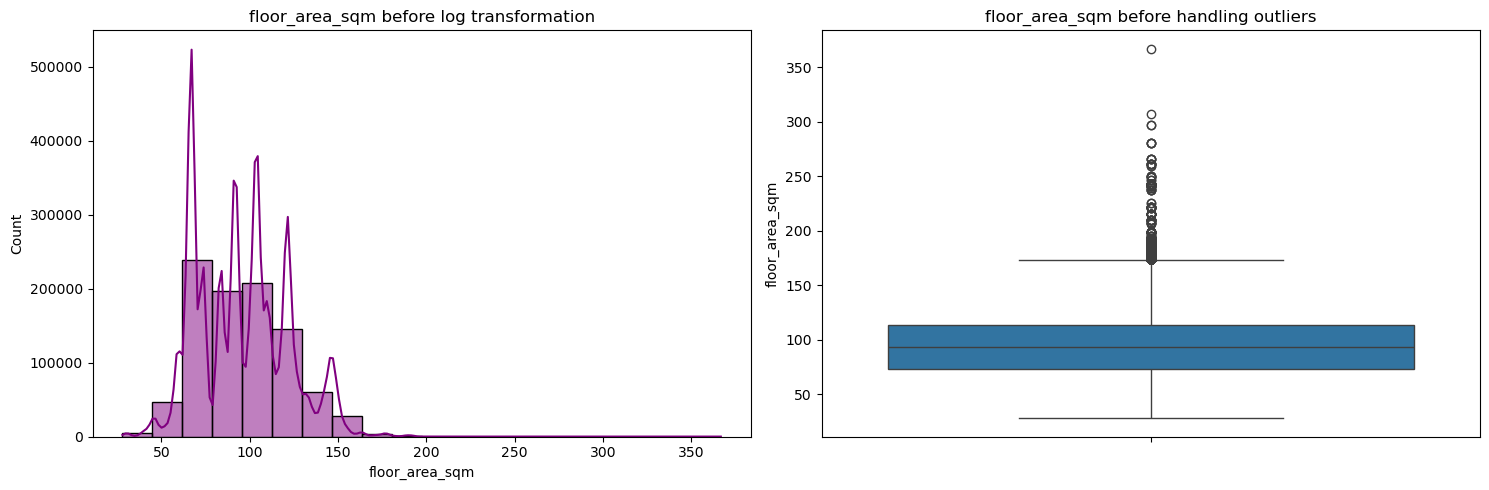

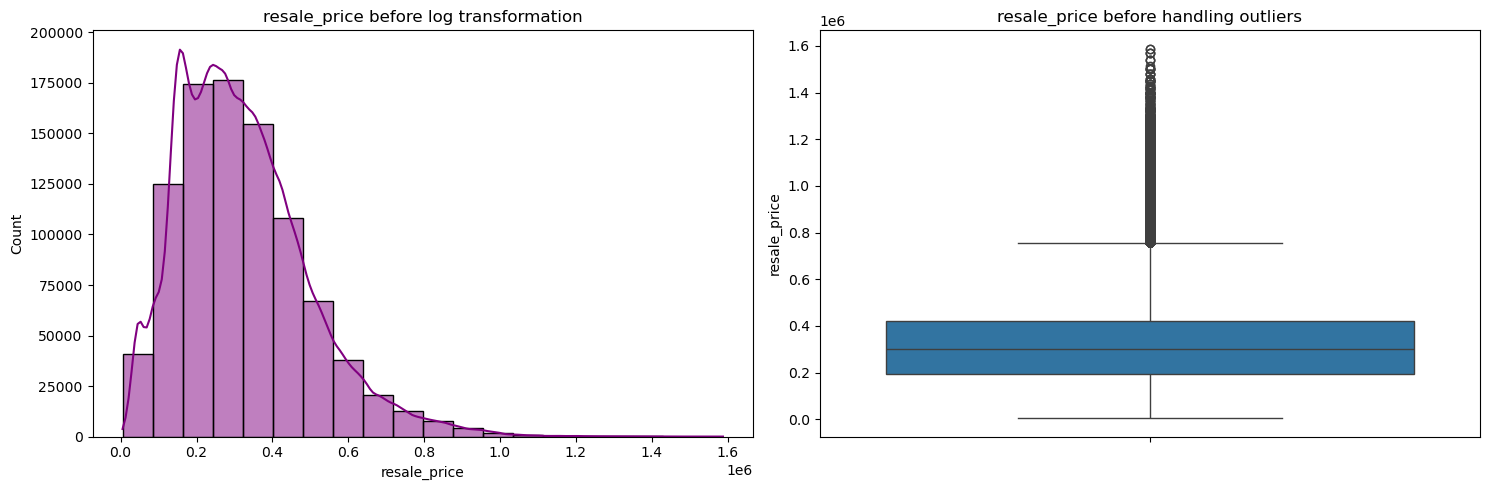

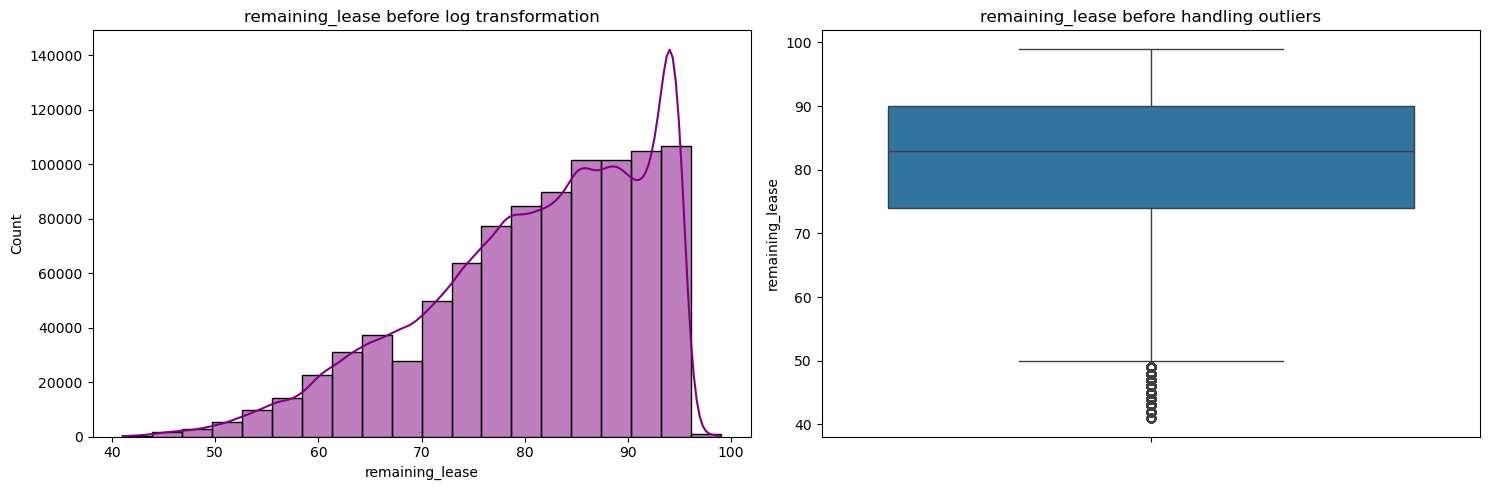

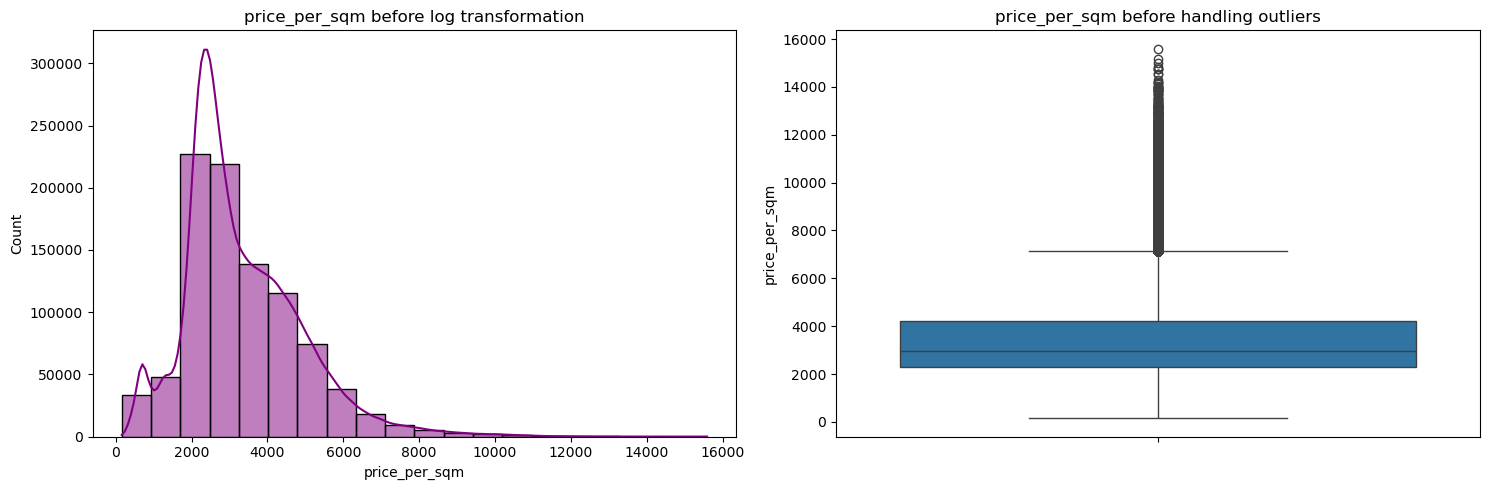

In [24]:
col1=['floor_area_sqm_log', 'resale_price_log', 'remaining_lease_log', 'price_per_sqm_log']
col2=['floor_area_sqm', 'resale_price', 'remaining_lease', 'price_per_sqm']
compare_chart(df, col2, col2)

In [25]:
def compare_chart(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig,axs=plt.subplots(1,2,figsize=(15,5))
        
        sns.histplot(data=df, x=col1, kde=True, bins=20, ax=axs[0], color='purple')
        axs[0].set_title(f"{col1}After log Transformation")
   
        sns.boxplot(data=df, y=col1, ax=axs[1])
        axs[1].set_title(f"{col2}After Handling Outliers")

        plt.tight_layout()
        plt.show()

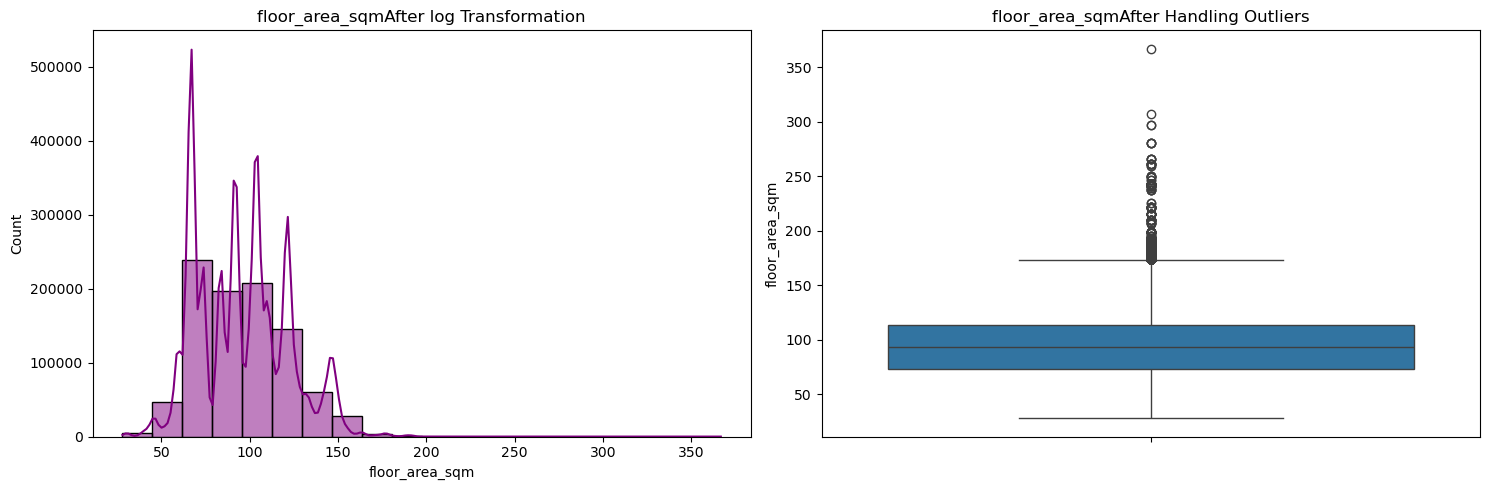

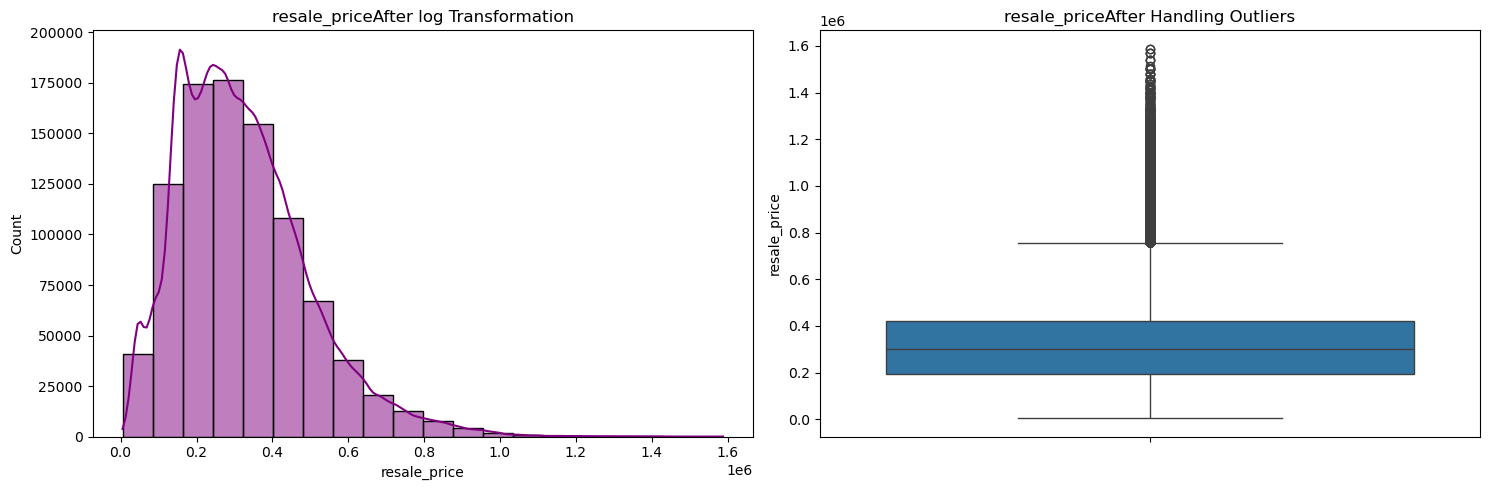

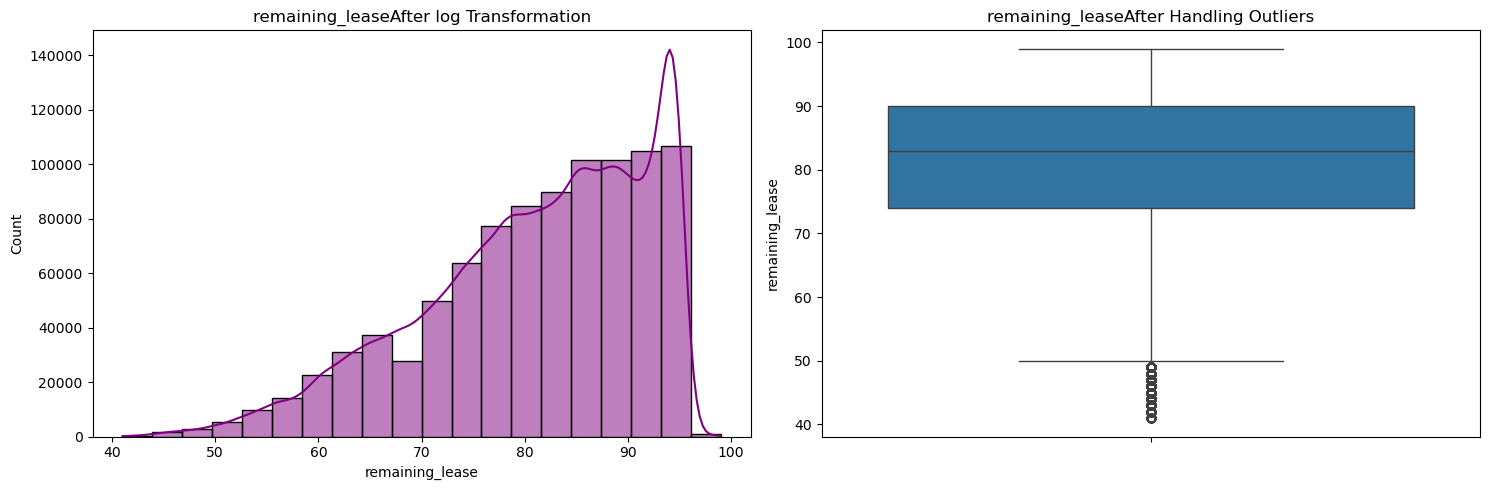

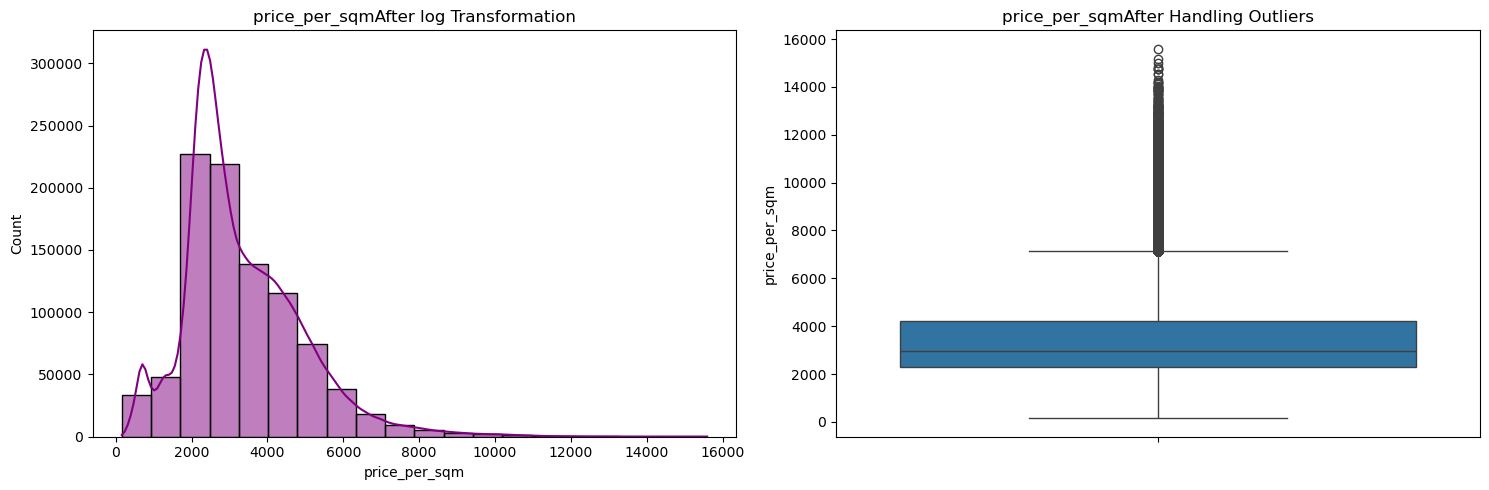

In [26]:
col1=['floor_area_sqm_log', 'resale_price_log', 'remaining_lease_log', 'price_per_sqm_log']
col2=['floor_area_sqm', 'resale_price', 'remaining_lease', 'price_per_sqm']
compare_chart(df, col2, col2)

In [27]:
df.drop(columns=['street_name','floor_area_sqm', 'resale_price', 'remaining_lease', 'price_per_sqm'], inplace=True)

posx and posy should be finite values
posx and posy should be finite values


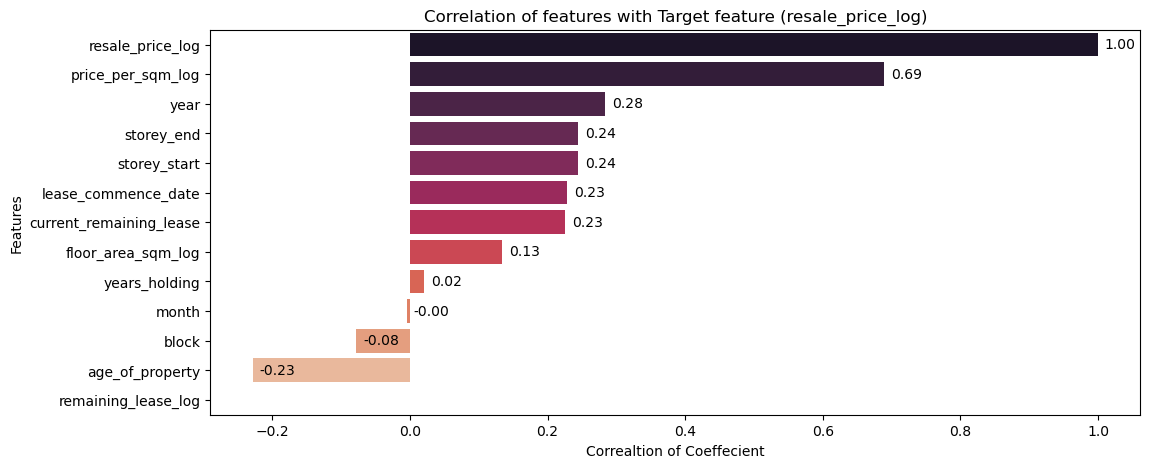

In [28]:
corr_plt=df[['month','block','floor_area_sqm_log','lease_commence_date','resale_price_log','remaining_lease_log','year','storey_start','storey_end','price_per_sqm_log',
             'years_holding','current_remaining_lease','age_of_property']].corr()
target_corr=corr_plt['resale_price_log'].sort_values(ascending=False)
plt.figure(figsize=(12,5))
ax=sns.barplot(x=target_corr.values, y=target_corr.index, palette='rocket')
plt.title("Correlation of features with Target feature (resale_price_log)")
plt.xlabel("Correaltion of Coeffecient")
plt.ylabel("Features")

for i,v in enumerate(target_corr.values):
    ax.text(v+0.01,i,f'{v:.2f}',color='black',va='center')
plt.show()

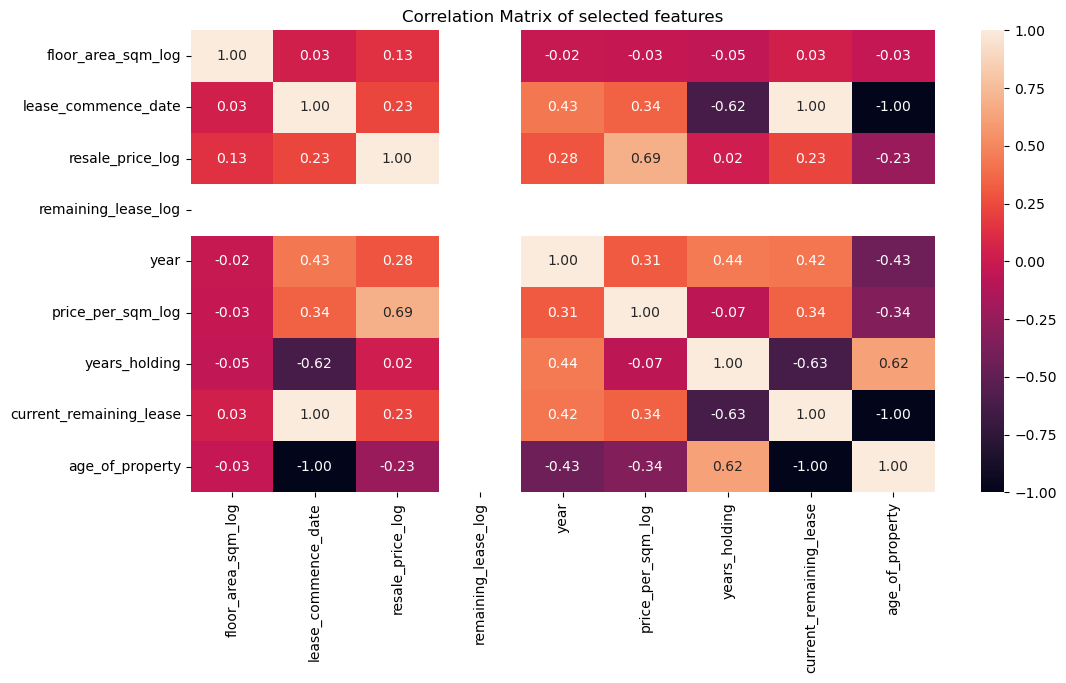

In [30]:
selected_cols=['floor_area_sqm_log','lease_commence_date','resale_price_log','remaining_lease_log','year','price_per_sqm_log','years_holding','current_remaining_lease','age_of_property']
corr_matrix=df[selected_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix of selected features')
plt.show()

In [31]:
df_new=df.copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 933610 entries, 0 to 933660
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    933610 non-null  int64  
 1   town                     933610 non-null  object 
 2   flat_type                933610 non-null  object 
 3   block                    933610 non-null  int64  
 4   flat_model               933610 non-null  object 
 5   lease_commence_date      933610 non-null  int64  
 6   year                     933610 non-null  int64  
 7   storey_start             933610 non-null  int64  
 8   storey_end               933610 non-null  int64  
 9   years_holding            933610 non-null  int64  
 10  current_remaining_lease  933610 non-null  float64
 11  age_of_property          933610 non-null  int64  
 12  floor_area_sqm_log       933610 non-null  float64
 13  resale_price_log         933610 non-null  float64
 14  remaining

In [33]:
from sklearn.preprocessing import LabelEncoder
def encoding(df, columns):
    le=LabelEncoder()
    df[columns]=le.fit_transform(df[columns])
    unique_labels=le.classes_
    encoded_values=le.transform(unique_labels)
    for i,j in zip(unique_labels, encoded_values):
        print(i, ':', j)

In [35]:
df_new['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [36]:
encoding(df_new, 'town')

ANG MO KIO : 0
BEDOK : 1
BISHAN : 2
BUKIT BATOK : 3
BUKIT MERAH : 4
BUKIT PANJANG : 5
BUKIT TIMAH : 6
CENTRAL AREA : 7
CHOA CHU KANG : 8
CLEMENTI : 9
GEYLANG : 10
HOUGANG : 11
JURONG EAST : 12
JURONG WEST : 13
KALLANG/WHAMPOA : 14
LIM CHU KANG : 15
MARINE PARADE : 16
PASIR RIS : 17
PUNGGOL : 18
QUEENSTOWN : 19
SEMBAWANG : 20
SENGKANG : 21
SERANGOON : 22
TAMPINES : 23
TOA PAYOH : 24
WOODLANDS : 25
YISHUN : 26


In [38]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [39]:
encoding(df_new, 'flat_type')

1 ROOM : 0
2 ROOM : 1
3 ROOM : 2
4 ROOM : 3
5 ROOM : 4
EXECUTIVE : 5
MULTI-GENERATION : 6


In [40]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [42]:
encoding(df_new, 'flat_model')

2-ROOM : 0
3GEN : 1
ADJOINED FLAT : 2
APARTMENT : 3
DBSS : 4
IMPROVED : 5
IMPROVED-MAISONETTE : 6
MAISONETTE : 7
MODEL A : 8
MODEL A-MAISONETTE : 9
MODEL A2 : 10
MULTI GENERATION : 11
NEW GENERATION : 12
PREMIUM APARTMENT : 13
PREMIUM APARTMENT LOFT : 14
PREMIUM MAISONETTE : 15
SIMPLIFIED : 16
STANDARD : 17
TERRACE : 18
TYPE S1 : 19
TYPE S2 : 20


In [43]:
df_new[['town','flat_type','flat_model']]=df_new[['town','flat_type','flat_model']].astype('int64')

In [44]:
df_new.head()

,month,town,flat_type,block,flat_model,lease_commence_date,year,storey_start,storey_end,years_holding,current_remaining_lease,age_of_property,floor_area_sqm_log,resale_price_log,remaining_lease_log,price_per_sqm_log
0,1,0,0,309,5,1977,1990,10,12,13,52.0,47,4.945852,13.332151,4.607545,8.655682
1,1,0,0,309,5,1977,1990,4,6,13,52.0,47,4.945852,13.332151,4.607545,8.655682
2,1,0,0,309,5,1977,1990,10,12,13,52.0,47,4.945852,13.332151,4.607545,8.655682
3,1,0,0,309,5,1977,1990,7,9,13,52.0,47,4.945852,13.332151,4.607545,8.655682
4,1,0,2,216,12,1976,1990,4,6,14,51.0,48,4.945852,13.332151,4.607545,8.655682


In [45]:
x=df_new.drop(['resale_price_log'], axis=1)
y=df_new['resale_price_log']
x.shape,y.shape

((933610, 15), (933610,))

In [49]:
def best_ML_Algorithm(x,y,algorithms):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)
    results={}
    for algorithm in algorithms:
        model=algorithm().fit(x_train,y_train)
        y_pred=model.predict(x_test)
        MAE=metrics.mean_absolute_error(y_test, y_pred)
        MSE=metrics.mean_squared_error(y_test, y_pred)
        RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        R2=metrics.r2_score(y_test, y_pred)
        results[algorithm.__name__]={'Mean Absolute Error' :MAE, 'Mean Squared Error' : MSE, 'Root Mean Squared Error' :RMSE, 'R2 Score' :R2}
    best_algorithm=max(results.items(), key=lambda item: item[1]['R2 Score'])[0]
    return best_algorithm,results

In [50]:
algorithms=[LinearRegression, DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor]
best_algorithm, results= best_ML_Algorithm(x,y,algorithms)
results_df = pd.DataFrame(results).transpose()
print("***Evaluation Metrics for all Algorithms***")
print(results_df.to_string())
print("***Best Algorithm is:", best_algorithm, "***")

***Evaluation Metrics for all Algorithms***
                       Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R2 Score
LinearRegression                  0.016797            0.001403                 0.037451  0.543727
DecisionTreeRegressor             0.001961            0.000152                 0.012331  0.950537
RandomForestRegressor             0.001626            0.000082                 0.009041  0.973409
ExtraTreesRegressor               0.001673            0.000088                 0.009377  0.971394
***Best Algorithm is: RandomForestRegressor ***


In [51]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model_regressor=RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)
model_regressor.fit(x_train, y_train)
y_pred=model_regressor.predict(x_test)
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2=metrics.r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R2 Score: {R2}")

Mean Absolute Error: 0.0016570005899929692
Mean Squared Error: 8.281429186043721e-05
Root Mean Squared Error: 0.009100235813452155
R2 Score: 0.9730594499460311


In [52]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model_regressor=DecisionTreeRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)
model_regressor.fit(x_train, y_train)
y_pred=model_regressor.predict(x_test)
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2=metrics.r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R2 Score: {R2}")

Mean Absolute Error: 0.001925619791040122
Mean Squared Error: 0.00014279834328884976
Root Mean Squared Error: 0.011949826077765725
R2 Score: 0.9535458695767107


In [53]:
feature_scores=pd.Series(model_regressor.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

price_per_sqm_log          0.524273
flat_type                  0.273401
floor_area_sqm_log         0.058540
year                       0.058415
town                       0.019121
block                      0.015610
current_remaining_lease    0.010556
flat_model                 0.010404
age_of_property            0.008255
years_holding              0.005822
lease_commence_date        0.005306
month                      0.004235
storey_start               0.003375
storey_end                 0.002687
remaining_lease_log        0.000000
dtype: float64

In [55]:
with open('Decisiontreemodel.pkl','wb') as files:
    pickle.dump(model_regressor, files)

In [56]:
with open('Decisiontreemodel.pkl','rb') as files:
    model=pickle.load(files)
predict=model.predict(np.array([[1,0,0,309,5,1977,1990,10,12,13,52.0,47,3.635067,4.465908,6.828872]]))
np.exp(predict[0])

616707.8295665958